In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
penguins = pd.read_csv("D://Pulkit//2017 Class-XII//Google Advanced Data Analytics Professional Certificate//5 - Regression Analysis//Datasets//penguins.csv")
#"https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")#sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [11]:
df = penguins[penguins.species != "Chinstrap"].copy().reset_index(drop = True)
df.dropna(inplace = True)

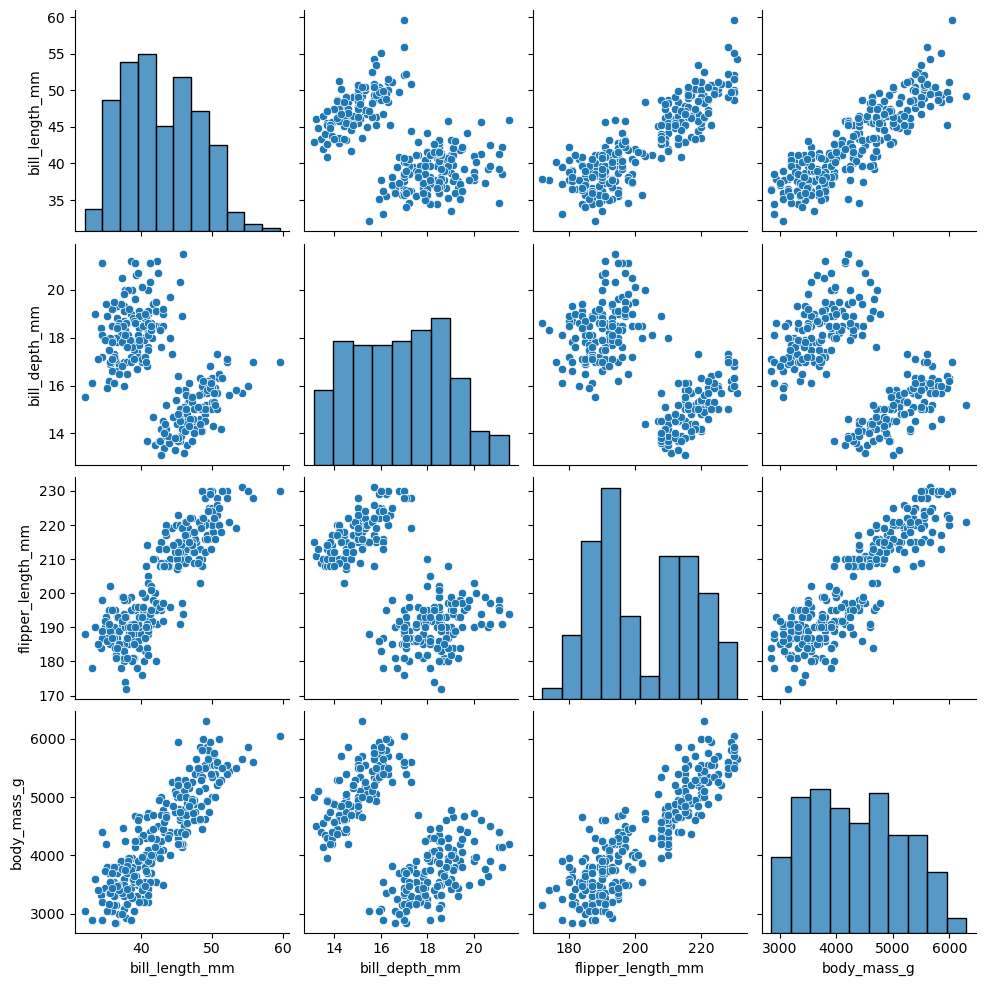

In [12]:
sns.pairplot(df)

- We see bill_length and body mass are linearly correlated. Also flipper_length - body_mass and flipper_length - bill_length are correlated. 
- Lets consider the first correlation. Their histogram also appear as normal distribution.
- And since each row has a data about a penguin, the dataset is independent. Only the homoscedasity assumption is left to be verified which will happen on calculating residuals after we build the model.

In [14]:
ols_df = df[['bill_length_mm', 'body_mass_g']]

In [15]:
# Formula
ols_formula = 'body_mass_g ~ bill_length_mm'

In [16]:
from statsmodels.formula.api import ols

In [17]:
# Build OLS and fit  model to data
OLS = ols(formula = ols_formula, data = ols_df)
model = OLS.fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.33e-85
Time:                        17:27:30   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Look at intercept and bill_length_mm. in y = c + mx, intercept is c and bill_length is m

So Body mass(g) = -1707.30 + 141.19 * bill length(mm)

Now lets verify the final assumption.

In [19]:
# Subset X
X = ols_df['bill_length_mm']

# Get Prections from Model
fitted_values = model.predict(X)

In [20]:
# Calculate residuals
residuals = model.resid

<AxesSubplot: xlabel='bill_length_mm', ylabel='body_mass_g'>

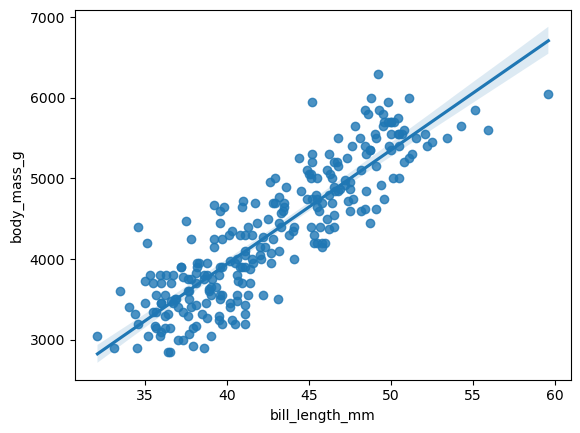

In [21]:
sns.regplot(x = 'bill_length_mm', y = 'body_mass_g', data = ols_df)

In [23]:
import matplotlib.pyplot as plt

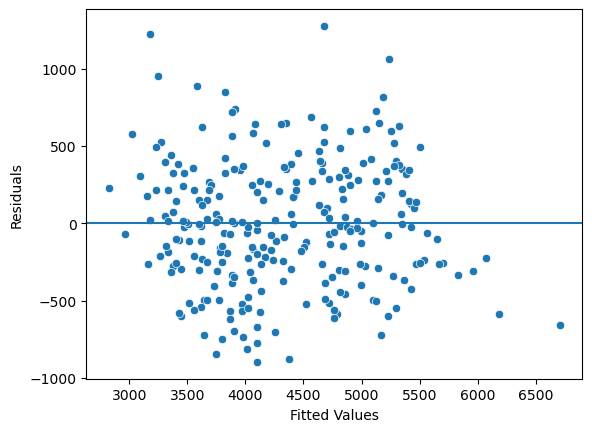

In [27]:
fig = sns.scatterplot(x = fitted_values, y = residuals)
fig.axhline(0)
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
plt.show()

We find that points are randomly distributed and hence we can verify homoscedality

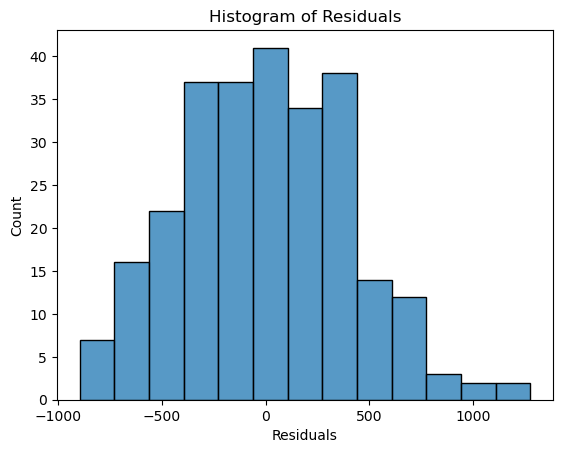

In [29]:
fig2 = sns.histplot(residuals)
fig2.set_xlabel('Residuals')
fig2.set_title('Histogram of Residuals')
plt.show()

The plot is normal but skewed to right. So create a QQmodel to verify normality.

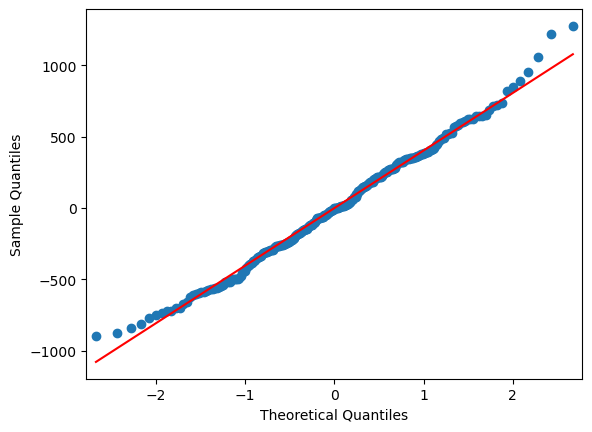

In [30]:
from statsmodels.api import qqplot
qqplot(residuals, line = 's')
plt.show()

Straight line travelling upwards with slight curvature on the extremes which can be explored later.

For now it's a very good confirmation of normality. So all asssumtions are met and so results from the regression model are likely reasonable.

# Another subset of Penguins

In [32]:
df2 = penguins[penguins.species == "Chinstrap"].reset_index()
df2.head()

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,FEMALE
1,153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,MALE
2,154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,MALE
3,155,Chinstrap,Dream,45.4,18.7,188.0,3525.0,FEMALE
4,156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,MALE


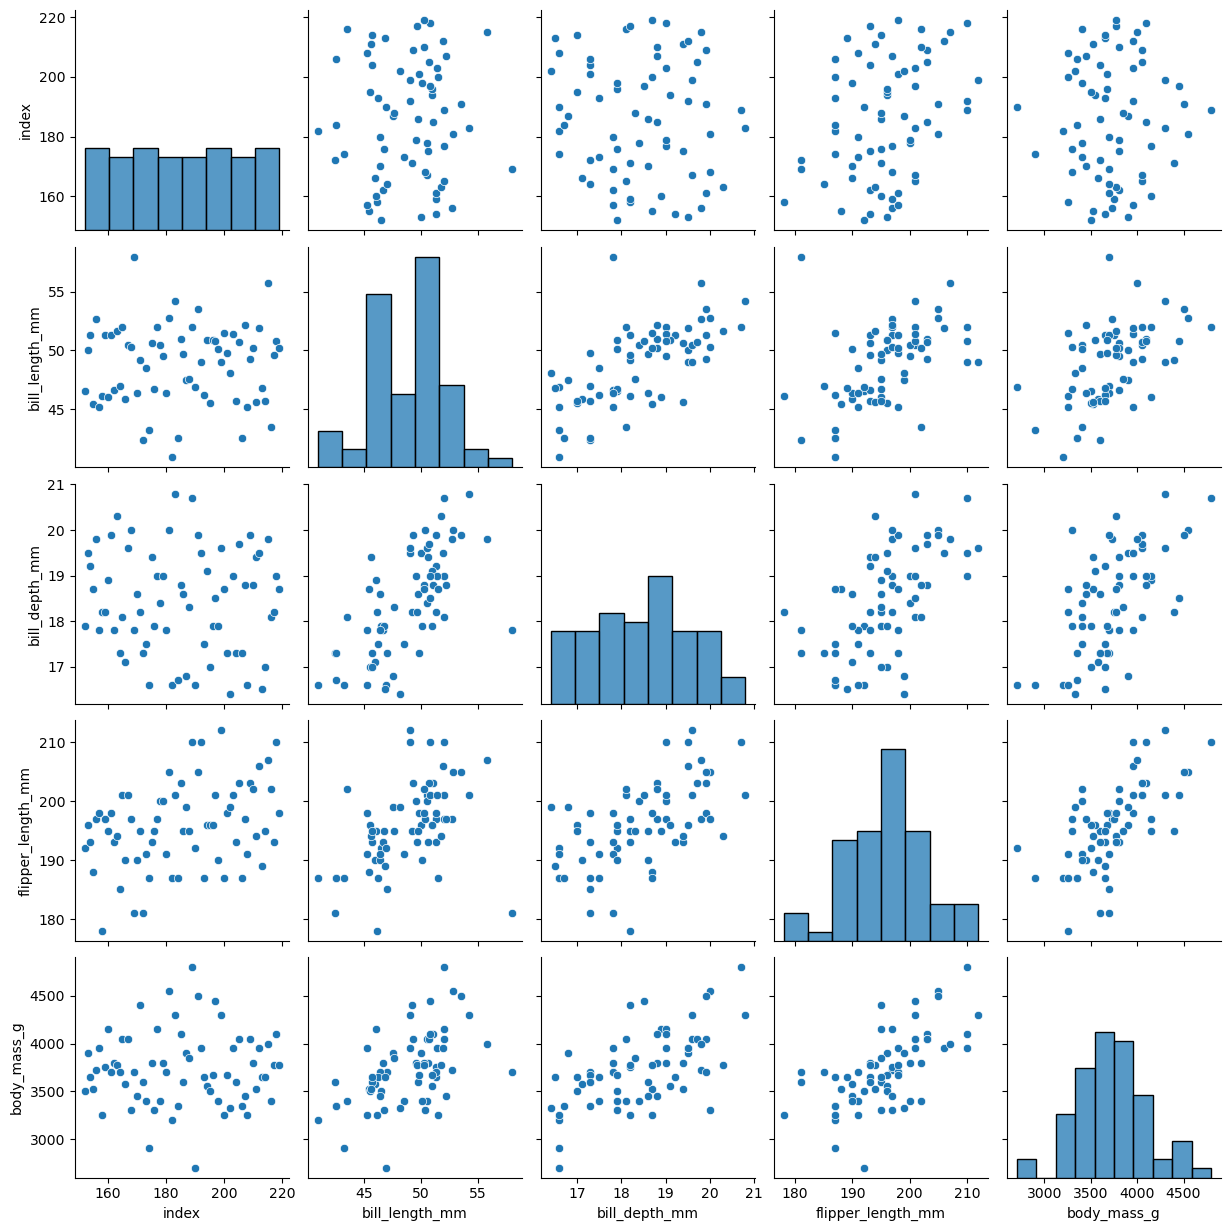

In [33]:
sns.pairplot(df2)

Examining Relationship in fliper_length_mm and bill_depth_mm

In [35]:
ols_df2 = df2[['flipper_length_mm', 'bill_depth_mm']]

In [37]:
ols_formula2 = "bill_depth_mm ~ flipper_length_mm"
OLS2 = ols(data = ols_df2, formula = ols_formula2)
model2 = OLS2.fit()

In [38]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          bill_depth_mm   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     33.48
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.16e-07
Time:                        11:08:15   Log-Likelihood:                -90.668
No. Observations:                  68   AIC:                             185.3
Df Residuals:                      66   BIC:                             189.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.3346      3.128      0.107      0.915      -5.910       6.579
flipper_length_mm     0.0924      0.016      5.786      0.000       0.060       0.124
==============================================================================
Omnibus:                        0.302   Durbin-Watson:                   2.272
Prob(Omnibus):                  0.860   Jarque-Bera (JB):                0.484
Skew:                          -0.073   Prob(JB):                        0.785
Kurtosis:                       2.614   Cond. No.                     5.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

bill depth = 0.33 + 0.09 * flipper length

In [44]:
X2 = ols_df2['flipper_length_mm']
fitted_values2 = model2.predict(X2)
residuals2 = model2.resid

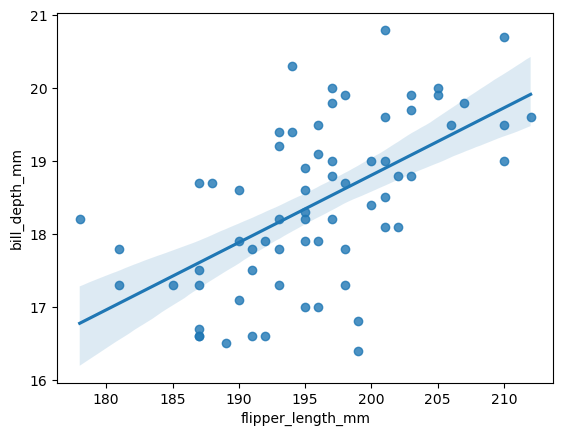

In [41]:
sns.regplot(data = ols_df2, x = 'flipper_length_mm', y = 'bill_depth_mm')

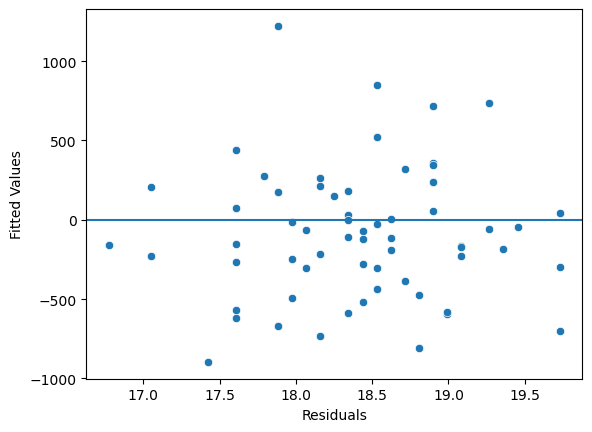

In [55]:
fig3 = sns.scatterplot(x = fitted_values2, y = residuals)
fig3.axhline(0)
fig3.set_xlabel('Residuals')
fig3.set_ylabel('Fitted Values')
plt.show()

Text(0.5, 1.0, 'Histogram of Residuals')

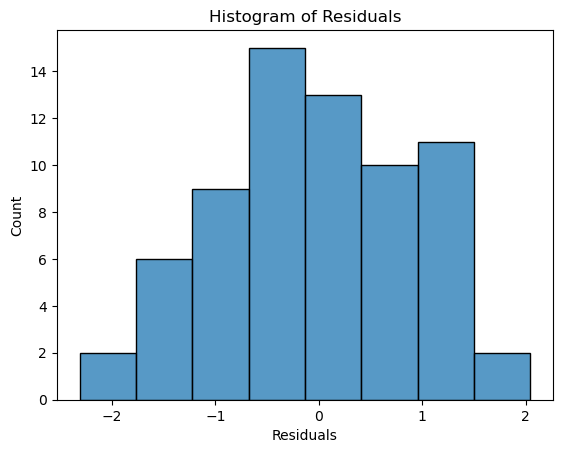

In [56]:
fig4 = sns.histplot(residuals2)
fig4.set_xlabel('Residuals')
fig4.set_title('Histogram of Residuals')

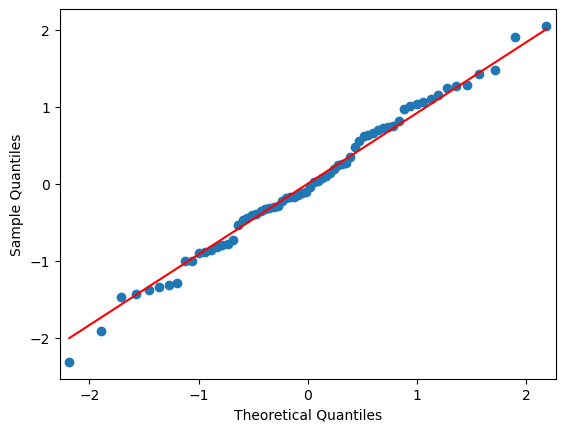

In [60]:
qqplot(residuals2, line = 's')
plt.show()

Normal Distribution of residuals, so homosedacity can be assumed. Also qqplot is linear.

So results from model are likely reasonable

## Week 3

In [5]:
penguins_x = penguins[['bill_length_mm', 'sex', 'species']]
penguins_y = penguins['body_mass_g']

In [7]:
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(penguins_x, penguins_y, test_size = 0.3, random_state = 42)

ols_formula3 = "body_mass_g ~ bill_length_mm + C(sex) + C(species)"

In [12]:
ols_data3 = pd.concat([X_train, Y_train], axis=1)

In [15]:
OLS = ols(formula = ols_formula3, data = ols_data3)
model = OLS.fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     346.7
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           2.06e-95
Time:                        18:18:19   Log-Likelihood:                -1653.8
No. Observations:                 232   AIC:                             3318.
Df Residuals:                     227   BIC:                             3335.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2143.6838    307.056      6.981      0.000    1538.639    2748.729
C(sex)[T.MALE]            539.6818     49.878     10.820      0.000     441.399     637.965
C(species)[T.Chinstrap]  -282.0025    100.621     -2.803      0.006    -480.273     -83.732
C(species)[T.Gentoo]     1117.8033     85.163     13.126      0.000     949.993    1285.614
bill_length_mm             32.8849      8.262      3.980      0.000      16.604      49.166
==============================================================================
Omnibus:                        0.100   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.218
Skew:                          -0.031   Prob(JB):                        0.897
Kurtosis:                       2.863   Cond. No.                         726.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R_Squared = 0.85 means model explains 85% of the variance in body mass.
- C(sex)[T.MALE] 's coeff is 539.68 meaning male penguins have .54kg more weight than female penguins of the same species and bill length.

In [18]:
y_pred = model.predict(X_test)

In [19]:
print(y_pred, Y_test)

194    4075.205021
157    3348.079273
225    4790.635479
208    3348.079273
318    4853.116811
          ...     
79     4067.820300
108    3396.598901
18     3274.924728
116    3413.041356
266    4757.750568
Length: 104, dtype: float64 194    3550.0
157    3950.0
225    4550.0
208    3250.0
318    4625.0
        ...  
79     4000.0
108    3175.0
18     3325.0
116    2900.0
266    4200.0
Name: body_mass_g, Length: 104, dtype: float64


# Week 4

In [43]:
chi_df = pd.DataFrame([['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], [650, 570, 420, 480, 510, 380, 490]])
#chi_df = pd.DataFrame({'Day of the Week' : ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 'Observed Values' : [650, 570, 420, 480, 510, 380, 490]})
chi_df.head()

,0,1,2,3,4,5,6
0,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
1,650,570,420,480,510,380,490


In [44]:
chi_df = chi_df.transpose().rename({0:'Day of the Week', 1:'Observed Values'}, axis = 1)
chi_df.head()

,Day of the Week,Observed Values
0,Sunday,650
1,Monday,570
2,Tuesday,420
3,Wednesday,480
4,Thursday,510


In [45]:
#chi_df = pd.concat([chi_df, pd.DataFrame({'Day of the Week':['Total'], 'Observed Values':[chi_df['Observed Values'].sum()]})]).reset_index(drop = True)
pd.DataFrame({'Day of the Week':['Total'], 'Observed Values':[chi_df['Observed Values'].sum()]})

,Day of the Week,Observed Values
0,Total,3500


### Hypothesis:
- **Null:** Number of website visitors are equal for each day of the week
- **Alternative:** Number of website visitors are not equal for each day of the week

Formula for chisquare: $\chi^2 = \sum \frac{(observed - expected)^2}{expected}$

In [41]:
import scipy as sp
import numpy as np

In [47]:
sp.stats.chisquare(f_obs = chi_df['Observed Values'], f_exp = np.ones(7)*chi_df['Observed Values'].mean())

Power_divergenceResult(statistic=97.6, pvalue=7.943886923343835e-19)

Since p-value is less than 5%, we can reject the null hypothesis and conclude that no. of website visitors is not equal per day.

Lets expand our analysis to look at relationship between the device used by user and membership status using chi-squared test for independence.

### Hypothesis:
- **Null:** Device type used by user to visit the website is independent of their membership status.
- **Alternative:** Device type used by user to visit the website is dependent on their membership status.

For Independence Test, Expected Value = $\frac{Column\ Total\  *\  Row\ Total}{Overall\ Total}$

In [61]:
chi2_df = pd.DataFrame({'Observed Values': ['Mac', 'PC'], 'Member': [850, 1300], 'Guest': [450, 900]}).set_index('Observed Values')
chi2_df.head()

,Member,Guest
Observed Values,,
Mac,850,450
PC,1300,900


In [70]:
print(chi2_df.sum(axis=1), "\n\n", chi2_df.sum(axis=0))

Observed Values
Mac    1300
PC     2200
dtype: int64 

 Member    2150
Guest     1350
dtype: int64


In [71]:
sp.stats.chi2_contingency(chi2_df)
# Output format: chi-squaer statistic, p-value, degrees of freedom, expected values array

(13.396423236539514,
 0.0002521045757089368,
 1,
 array([[ 798.57142857,  501.42857143],
        [1351.42857143,  848.57142857]]))

Since the p-value is smaller than 0.05, we reject the null hypothesis and conclude that device type used is dependent on whether the user is a member or a guest. So it is recommended to look deeper into why visitors sign up for paid memberships more on a particular device. Maybe due to size of button on that device, or there's a bug on the less used device, etc.

- Chi-squared Goodness of Fit is used to test if an observed variable follows an expected distribution.
- Chi-squared Test for Independence is used to check if two categorical variables are independent of each other.

In [2]:
df3 = sns.load_dataset("diamonds")

In [3]:
df3.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot: xlabel='color', ylabel='log_price'>

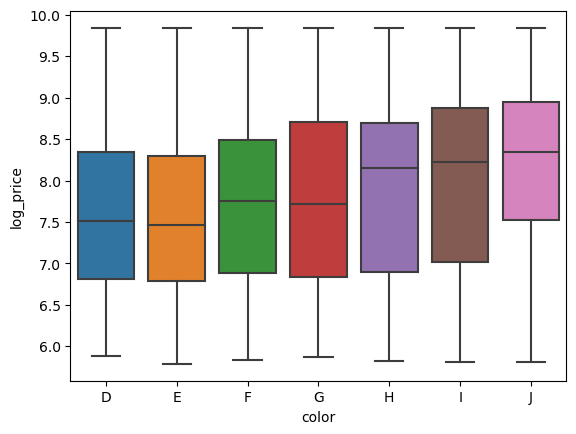

In [6]:
import numpy as np
df3['log_price'] = np.log(df3.price)
sns.boxplot(data = df3, x = 'color', y = 'log_price')

Box plots show that mean of log prices for all colors appear to be same or atleast similar. So we can perform one way ANOVA test to check if mean prices are same for all colors or not.

In [5]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [12]:
model3 = ols(formula = "log_price ~ C(color)", data = df3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     237.8
Date:                Tue, 17 Oct 2023   Prob (F-statistic):          3.77e-301
Time:                        23:35:08   Log-Likelihood:                -76617.
No. Observations:               53940   AIC:                         1.532e+05
Df Residuals:                   53933   BIC:                         1.533e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    625.984      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.370      0.018      -0.069      -0.006
C(color)[T.F]     0.1455      0.016      9.146      0.000       0.114       0.177
C(color)[T.G]     0.1727      0.015     11.219      0.000       0.143       0.203
C(color)[T.H]     0.3015      0.016     18.390      0.000       0.269       0.334
C(color)[T.I]     0.4061      0.018     22.250      0.000       0.370       0.442
C(color)[T.J]     0.5291      0.022     23.537      0.000       0.485       0.573
==============================================================================
Omnibus:                    11794.122   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2240.596
Skew:                           0.064   Prob(JB):                         0.00
Kurtosis:                       2.010   Cond. No.                         8.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
sm.stats.anova_lm(model3, typ=2)

,sum_sq,df,F,PR(>F)
C(color),1431.255783,6.0,237.807767,3.767555e-301
Residual,54099.661516,53933.0,NaN,NaN


- We see that p value is < 5% so we rejet the null hypothesis and conclude that prices are not same for all colors.
- Now lets also include cut in our analysis and to check our hypothesis,perform the two way anova test.

In [14]:
model4 = ols(formula = "log_price ~ C(color) + C(cut) + C(color):C(cut)", data = df3).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     72.53
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:35:56   Log-Likelihood:                -76115.
No. Observations:               53940   AIC:                         1.523e+05
Df Residuals:                   53905   BIC:                         1.526e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.4567      0.019    399.952      0.000       7.420       7.493
C(color)[T.E]                        -0.0056      0.024     -0.230      0.818      -0.054       0.042
C(color)[T.F]                         0.1755      0.025      7.136      0.000       0.127       0.224
C(color)[T.G]                         0.2352      0.023     10.035      0.000       0.189       0.281
C(color)[T.H]                         0.2756      0.026     10.695      0.000       0.225       0.326
C(color)[T.I]                         0.3787      0.029     13.240      0.000       0.323       0.435
C(color)[T.J]                         0.5457      0.038     14.345      0.000       0.471       0.620
C(cut)[T.Premium]                     0.2828      0.031      9.116      0.000       0.222       0.344
C(cut)[T.Very Good]                   0.2295      0.032      7.261      0.000       0.168       0.291
C(cut)[T.Good]                        0.2675      0.043      6.243      0.000       0.184       0.351
C(cut)[T.Fair]                        0.6610      0.080      8.268      0.000       0.504       0.818
C(color)[T.E]:C(cut)[T.Premium]      -0.0322      0.040     -0.797      0.426      -0.112       0.047
C(color)[T.F]:C(cut)[T.Premium]       0.0313      0.041      0.772      0.440      -0.048       0.111
C(color)[T.G]:C(cut)[T.Premium]      -0.0656      0.039     -1.695      0.090      -0.142       0.010
C(color)[T.H]:C(cut)[T.Premium]       0.0947      0.041      2.299      0.022       0.014       0.175
C(color)[T.I]:C(cut)[T.Premium]       0.0841      0.046      1.824      0.068      -0.006       0.174
C(color)[T.J]:C(cut)[T.Premium]       0.0610      0.057      1.065      0.287      -0.051       0.173
C(color)[T.E]:C(cut)[T.Very Good]    -0.0931      0.041     -2.284      0.022      -0.173      -0.013
C(color)[T.F]:C(cut)[T.Very Good]    -0.1013      0.041     -2.449      0.014      -0.182      -0.020
C(color)[T.G]:C(cut)[T.Very Good]    -0.1590      0.040     -3.941      0.000      -0.238      -0.080
C(color)[T.H]:C(cut)[T.Very Good]    -0.0247      0.043     -0.574      0.566      -0.109       0.060
C(color)[T.I]:C(cut)[T.Very Good]     0.0359      0.048      0.750      0.453      -0.058       0.130
C(color)[T.J]:C(cut)[T.Very Good]    -0.0979      0.060     -1.644      0.100      -0.215       0.019
C(color)[T.E]:C(cut)[T.Good]         -0.0112      0.056     -0.201      0.841      -0.121       0.099
C(color)[T.F]:C(cut)[T.Good]         -0.1196      0.056     -2.122      0.034      -0.230      -0.009
C(color)[T.G]:C(cut)[T.Good]         -0.0453      0.056     -0.805      0.421      -0.156       0.065
C(color)[T.H]:C(cut)[T.Good]         -0.1066      0.060     -1.788      0.074      -0.223       0.010
C(color)[T.I]:C(cut)[T.

In [15]:
sm.stats.anova_lm(model4, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),1325.991186,6.0,224.341769,4.300381e-284
C(cut),901.918331,4.0,228.890609,3.250547e-195
C(color):C(cut),96.058742,24.0,4.062996,8.168980e-11
Residual,53101.684443,53905.0,NaN,NaN


Again we see all p values are < 5% so we conclude that prices vary by cut and color and also that there is an interaction effect between color and cut that impact the price of the diamond

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [19]:
tukey_oneway = pairwise_tukeyhsd(endog = df3.log_price, groups = df3.color, alpha = 0.05)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.2115,-0.0842,0.0092,False
D,F,0.1455,0.0,0.0986,0.1924,True
D,G,0.1727,0.0,0.1273,0.2181,True
D,H,0.3015,0.0,0.2532,0.3499,True
D,I,0.4061,0.0,0.3522,0.4599,True
D,J,0.5291,0.0,0.4628,0.5953,True
E,F,0.183,0.0,0.1406,0.2255,True
E,G,0.2102,0.0,0.1694,0.251,True
E,H,0.339,0.0,0.295,0.3831,True
E,I,0.4436,0.0,0.3936,0.4935,True


- ANOVA or Analysis of variance only tests if there are differences in a continuous variable for the groups we are interested in. 
- Like if all means are same. One-way is used for one set of groups only, but with two-way we can check for another set simultaneously. 
- If they are not same then it doesn't tell which ones are different and by how much. 
- So we did a post hoc test which does a pairwise comparson for all available groups while controlling for error rate (due to running multiple hypothesis tests all at once).

- Similarly we can use ANCOVA or analysis of co-variance to control for another variable, to isolate the effect of groups from covariates. It acts similar to a filter like including for a particular year.
- Using MANOVA (multivariate ANOVA) and MANCOVA, we can test the effect of independent categorical variables on multiple dependent continuous outcome variables 

# Week 5

### Binomial Logistic Regression Assumptions
- Linearity in Logistic Regression: There shoud be a linear relationship between each X variable and the logit of probability that Y=1

odds = $\frac{p}{1-p}$

logit(p) = $ \log\frac{p}{1-p}$

In terms of n X independent variables, logit(p) = $\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ...+ \beta_n X_n$

Like in linear regression we minimize SSR, in logistic regresion we find the beta parameters that maximize the likelihood of the model. Likelihood is the probability of observing the actual data, given the beta parameters.

- 2nd is the idependence assumption. If its true then P(A.B) = P(A).P(B)
- 3rd is no multicollinearoty
- 4th is there's no extreme outliers in the dataset.

In [4]:
diabetes = pd.read_csv("D://Pulkit//2017 Class-XII//Google Advanced Data Analytics Professional Certificate//5 - Regression Analysis//Datasets//diabetes.csv")
print(diabetes.describe())
diabetes.head()

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

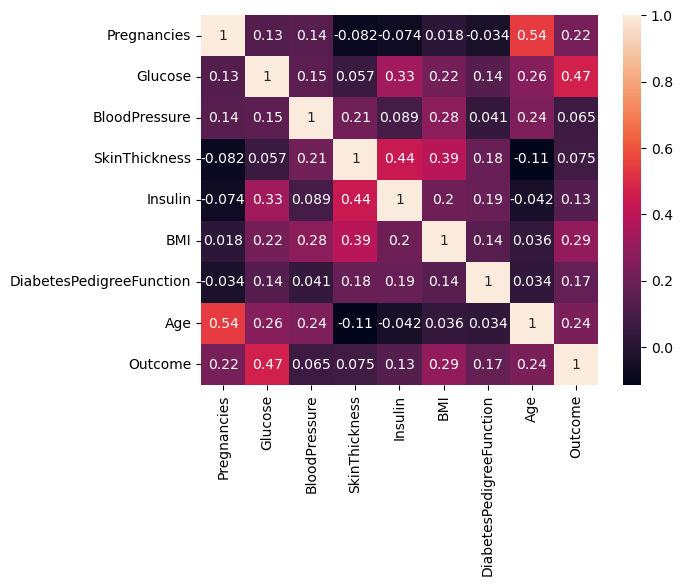

In [18]:
sns.heatmap(diabetes.corr(), annot=True);

In [61]:
# Using only those features which have significant correlation (>0.1) with outcome 
# and also low inter-correlation among other features.

X = diabetes[['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]#.iloc[:,:-1]
Y = diabetes['Outcome']

In [62]:
X.shape

(768, 5)

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [81]:
model5 = LogisticRegression().fit(X_train, Y_train)
Y_pred = model5.predict(X_test)
print(([(x, y) for x,y in zip(Y_test, Y_pred) if x!=y]))
model5.predict_proba(X_test)

[(0, 1), (0, 1), (0, 1), (0, 1), (1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (0, 1), (1, 0), (0, 1), (0, 1), (1, 0), (0, 1), (1, 0), (0, 1), (1, 0), (0, 1), (0, 1), (1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (0, 1), (0, 1), (0, 1), (1, 0), (1, 0), (1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0)]


array([[0.77729144, 0.22270856],
       [0.79620039, 0.20379961],
       [0.87683756, 0.12316244],
       [0.83470426, 0.16529574],
       [0.47285076, 0.52714924],
       [0.57424644, 0.42575356],
       [0.985078  , 0.014922  ],
       [0.48459584, 0.51540416],
       [0.45928251, 0.54071749],
       [0.18781355, 0.81218645],
       [0.80383917, 0.19616083],
       [0.08802189, 0.91197811],
       [0.70411902, 0.29588098],
       [0.68502073, 0.31497927],
       [0.92159228, 0.07840772],
       [0.6590399 , 0.3409601 ],
       [0.85653448, 0.14346552],
       [0.93257104, 0.06742896],
       [0.27815843, 0.72184157],
       [0.4243205 , 0.5756795 ],
       [0.76515221, 0.23484779],
       [0.89925695, 0.10074305],
       [0.61512312, 0.38487688],
       [0.90057932, 0.09942068],
       [0.54287042, 0.45712958],
       [0.12253193, 0.87746807],
       [0.90136456, 0.09863544],
       [0.95773155, 0.04226845],
       [0.70992783, 0.29007217],
       [0.86277932, 0.13722068],
       [0.

In [82]:
model5.coef_

array([[ 0.03329108, -0.00179138,  0.09658193,  0.63118945,  0.04115424]])

In [83]:
model5.intercept_

array([-9.49694493])

<AxesSubplot: xlabel='DiabetesPedigreeFunction', ylabel='Outcome'>

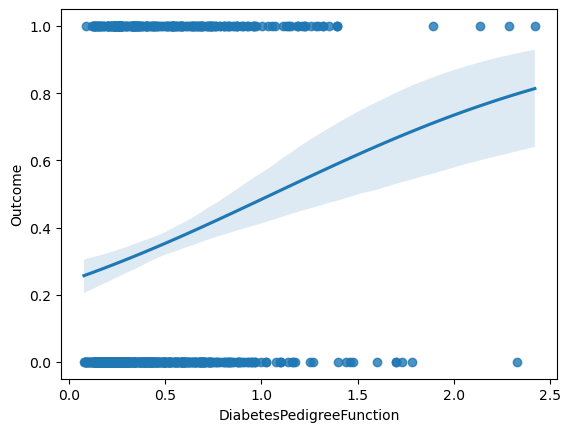

In [84]:
sns.regplot(x=X['DiabetesPedigreeFunction'], y=Y, logistic=True)

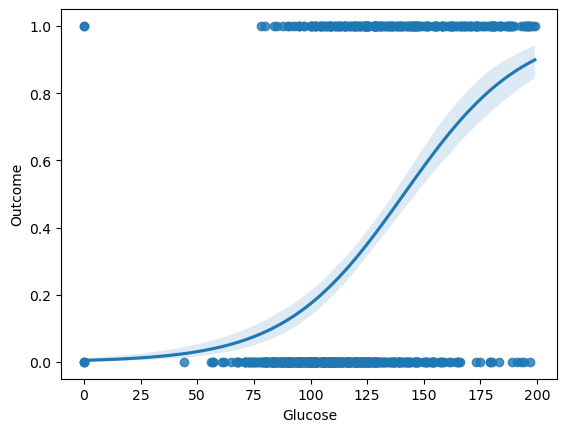

In [85]:
sns.regplot(x=X['Glucose'], y=Y, logistic=True);

In [70]:
import sklearn.metrics as metrics

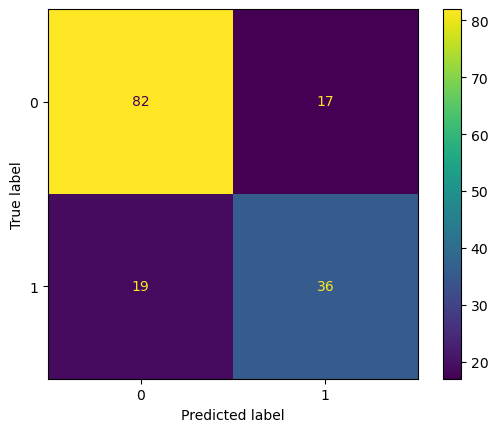

In [86]:
cm = metrics.confusion_matrix(Y_test, Y_pred, labels = model5.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model5.classes_)
disp.plot();

Not a highly successful model

In [87]:
36 / (36+17)

0.6792452830188679

In [88]:
metrics.precision_score(Y_test, Y_pred)

0.6792452830188679

In [89]:
36/(36+19)

0.6545454545454545

In [90]:
metrics.recall_score(Y_test, Y_pred)

0.6545454545454545

In [92]:
(36 + 82)/154

0.7662337662337663

In [91]:
metrics.accuracy_score(Y_test, Y_pred)

0.7662337662337663

Recall and Precision scores are low so model is not a good one.

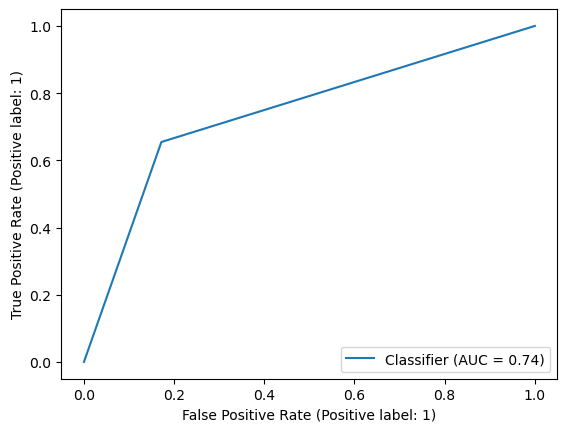

In [94]:
metrics.RocCurveDisplay.from_predictions(Y_test, Y_pred);

Receiver Operating Classifier Curve: More the ROC curve hugs the top left, better the model at classifying data. The obtained curve is not that good.

In [95]:
metrics.roc_auc_score(Y_test, Y_pred)

0.7414141414141414

- AUC: Area under ROC curve: Aggregates a classifier's perfomance across al thresholds into one measure ranging from 0 to 1.
- Here the model is better than random classifier (Score 0.5) but still not a very good model.

In [97]:
np.exp(model5.coef_)

array([[1.03385143, 0.99821022, 1.10139981, 1.87984523, 1.04201282]])

In [98]:
model5.coef_

array([[ 0.03329108, -0.00179138,  0.09658193,  0.63118945,  0.04115424]])

In [99]:
(np.exp(model5.coef_) - 1 )*100

array([[ 3.38514316, -0.17897752, 10.13998138, 87.98452333,  4.20128153]])

Order of independent variables: 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'

So for every one unit increase in Glucose, the odds that person is diabetic increases by 3.38%, for Insulin it decreases by 0.18%, for BMI it increases by 10.14% and so on.

In [ ]:
df.describe(include=['O'])

## When to use a particular metric:
- Precision: When cost of a false positive is higher than a false negative. Eg. Email Spam Detection
- Recall: When cost of a false negative is higher than a false positive. Eg. Credit Card Fraud Detection
- Accuracy: When the data is balanced as unbalaced data can lead to high accuracy but this would be due to bias and not actual success of model.